# Three variable Monte-Carlo exponential function integral


In [97]:
# TODO:
# * beta is inaccurate & mass-dep: testing exponential mass function
# * formula is incorrect: 
# - testing r = 0 case
# - testing sigma_zeta = 0 => 2 observable case
# * numerical inaccuracy of PDF
# - testing 1D pdf (2 observables)
# <Sigma | lambda> = … 
# integration over lambda


In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.integrate as integrate
from tqdm import tqdm,trange
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
print(np.log(1E13))

29.933606208922594


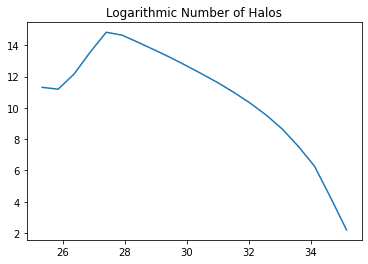

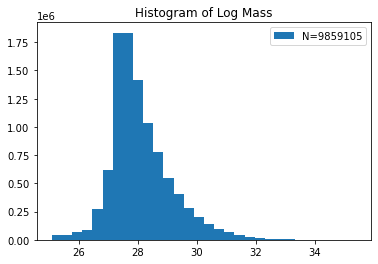

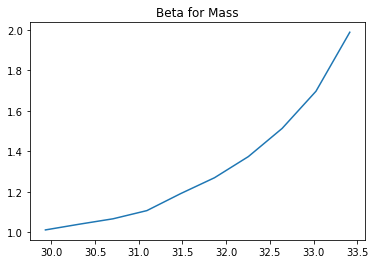

In [100]:
from mass_function import MassFunction

mf = MassFunction(kind="nbody")

# Richness scaling relations


In [101]:
from scaling_relation import ScalingRelation

sr = ScalingRelation()

self.alpha_lam=0.939, self.pi_lam=-27.547425726070088, self.scatter_lam=0.36
self.alpha_SZ=1.519, self.pi_SZ=-50.085787147359696, self.scatter_SZ=0.152
self.alpha_Mwl=1, self.pi_Mwl=0, self.scatter_Mwl=0.5


# MonteCarlo

First, Monte Carlo from the covariance matrix and the mean. How does this work?

Second, define a narrow richness bin to mimic the distribution of halo mass given richness. The expectation value given no correlation should be
$$\frac{\lambda-\pi_{\lambda}}{\alpha_{\lambda}}$$

But the downward correction is
$$-(\frac{\sigma_\lambda}{\alpha})^2 \beta$$

Third,


In [102]:
color_list = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'tab:cyan', "gold"]


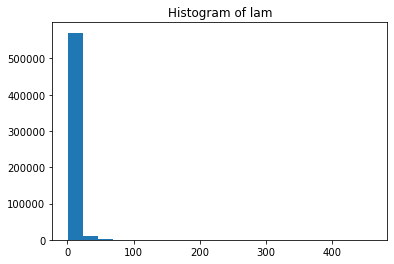

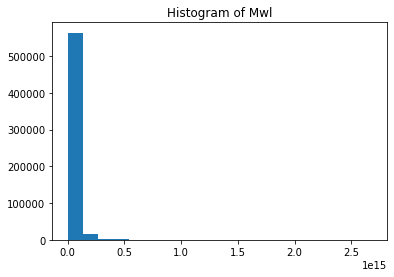

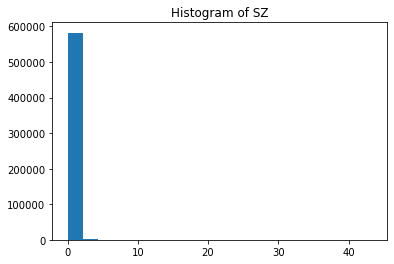

In [103]:
from monte_carlo_observable import MonteCarloObservables

mco = MonteCarloObservables(mass_function=mf,
                            scaling_relation=sr,
                            r=0,
                            multiplier = 1
)

In [104]:
# predicted_lnsig = [None] * len(mco.lnlam)
# for i in trange(len(mco.lnlam)):
#     predicted_lnsig[i] = mco.theory_calculate_mean_mwl_given_lam_sz(mco.lnlam[i],mco.lnSZ[i],correction=True)

# predicted_lnsig = np.array(predicted_lnsig)
# for_csv = {'lnlam':mco.lnlam,'lnsigma':mco.lnMwl,'lnzeta':mco.lnSZ,'predicted_lnsig':predicted_lnsig}
# for_csv_df = pd.DataFrame(data=for_csv)
# for_csv_df.to_csv("../data/csv_for_tianyu")

In [105]:
kwargs, lam_list, sz_list, diff_list, count_list = mco.verify_theory_mean_mwl_given_lam_sz_bin(lam1=1,
                                            lam2=50,
                                            sz_threshold=4,
                                            bin_numbers=[2,5,10],
                                            NSTEPS=100,
                                            pdf="rv_histogram")


Lam bounds are 1.0 25.499999999999996
SZ bounds are 0.0010000000000000002 4.0
Theory:30.674705141560942 MC:30.684944118683212
The count in the bin is 567340
The log diff is -0.010238977122270398
The percentage error is -1.0186737242352306 %
Lam bounds are 1.0 25.499999999999996
SZ bounds are 4.0 100.00000000000004
Theory:33.93495895680762 MC:33.40560655733367
The count in the bin is 1
The log diff is 0.5293523994739502
The percentage error is 69.78324353394628 %
Lam bounds are 25.499999999999996 49.99999999999999
SZ bounds are 0.0010000000000000002 4.0
Theory:32.803869810353724 MC:32.810395563551076
The count in the bin is 8755
The log diff is -0.0065257531973514915
The percentage error is -0.6504506711518254 %
Lam bounds are 25.499999999999996 49.99999999999999
SZ bounds are 4.0 100.00000000000004
Theory:33.95351310572882 MC:33.9641469724312
The count in the bin is 55
The log diff is -0.010633866702384864
The percentage error is -1.0577527021590316 %
Lam bounds are 1.0 10.8
SZ bounds 

/global/homes/z/zchusre/.conda/envs/spt_selection/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/global/homes/z/zchusre/.conda/envs/spt_selection/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Statistics for 2 bins
count_list[i]=array([[5.6734e+05, 1.0000e+00],
       [8.7550e+03, 5.5000e+01]])
diff_list[i]=array([[-0.01023898,  0.5293524 ],
       [-0.00652575, -0.01063387]])
---------------------------------------
Statistics for 5 bins
count_list[i]=array([[5.25522e+05, 0.00000e+00],
       [3.60290e+04, 0.00000e+00],
       [9.32800e+03, 3.00000e+00],
       [3.53300e+03, 1.60000e+01],
       [1.68300e+03, 3.70000e+01]])
diff_list[i]=array([[-0.01086204,         nan],
       [-0.00304373,         nan],
       [-0.00162748,  0.44850949],
       [-0.02855589, -0.06654997],
       [ 0.00768136, -0.00908754]])
---------------------------------------
Statistics for 10 bins
count_list[i]=array([[4.46225e+05, 0.00000e+00],
       [7.92970e+04, 0.00000e+00],
       [2.48580e+04, 0.00000e+00],
       [1.11710e+04, 0.00000e+00],
       [5.78900e+03, 1.00000e+00],
       [3.53900e+03, 2.00000e+00],
       [2.12200e+03, 6.00000e+00],
       [1.41100e+03, 1.00000e+01],
       [9.80000

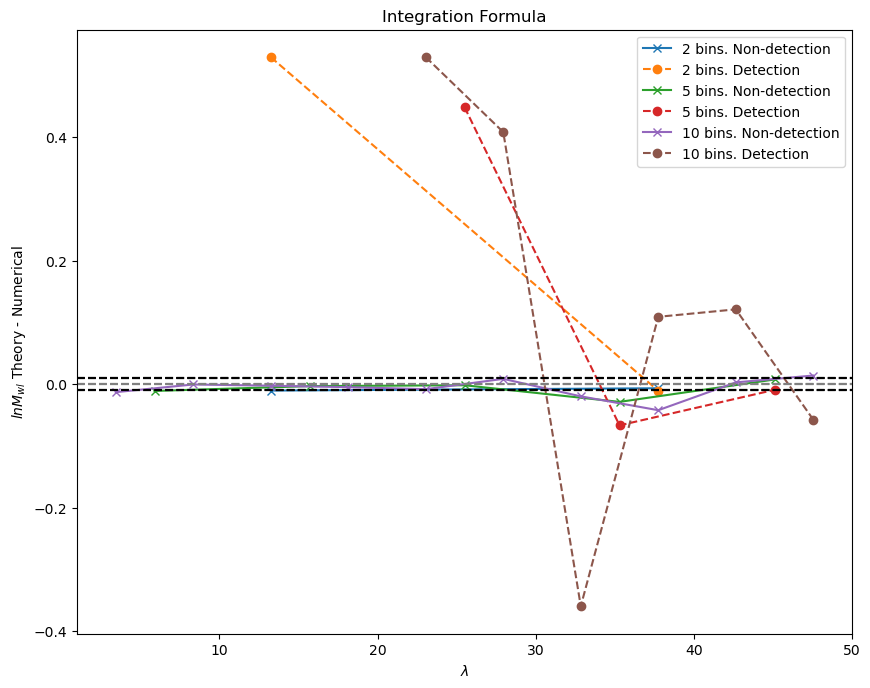

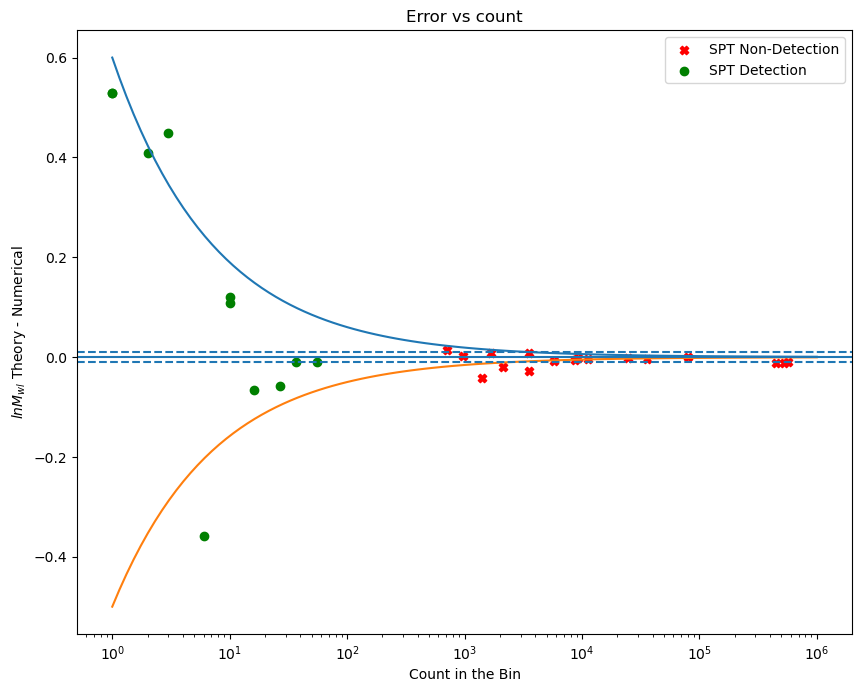

In [106]:
mco.plot_diff_by_bin_numbers(lam_list,sz_list,diff_list,count_list, **kwargs)